ASSIGNMENT OF 25 MARCH 

Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [3]:
import pandas as pd

df=pd.read_excel("flight_price.xlsx")
df.shape

# the data set has 10683 rows and 11 column 

(10683, 11)

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.


<AxesSubplot: xlabel='Price', ylabel='Count'>

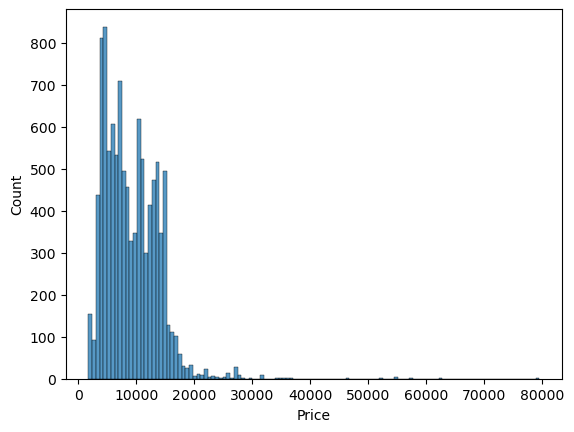

In [4]:
import seaborn as sns


# the distribution of price is right skwed 

sns.histplot(df["Price"])

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [5]:
print("minimum price of the flight is ",df["Price"].min())
print("maximum price of the flight is ",df["Price"].max())

minimum price of the flight is  1759
maximum price of the flight is  79512


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.


<AxesSubplot: xlabel='Airline', ylabel='Price'>

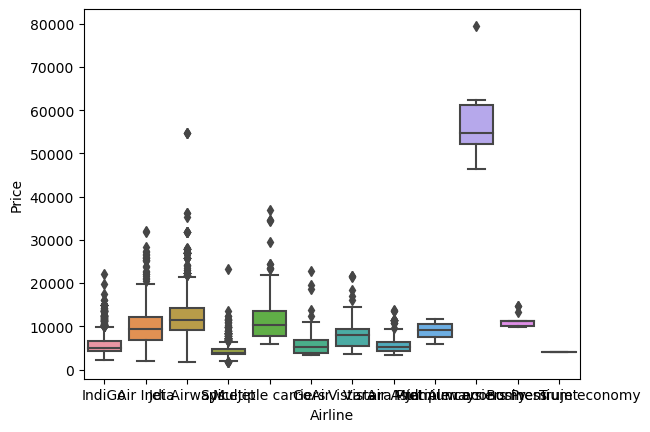

In [6]:
df["Airline"]
df["Price"]

sns.boxplot(data=df[["Price","Airline"]],x="Airline",y="Price")

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.


<AxesSubplot: >

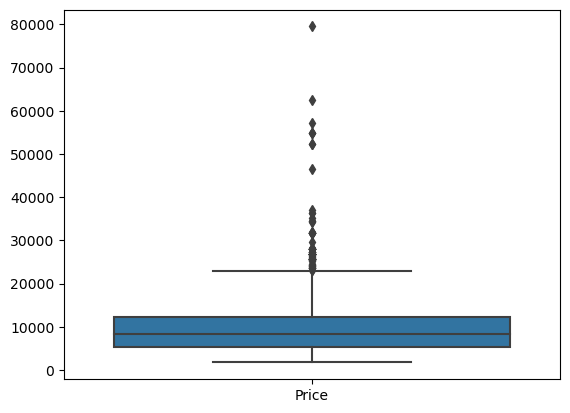

In [7]:
sns.boxplot(data=df)

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?


/tmp/ipykernel_3972/153445432.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
/tmp/ipykernel_3972/153445432.py:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 3, 4)


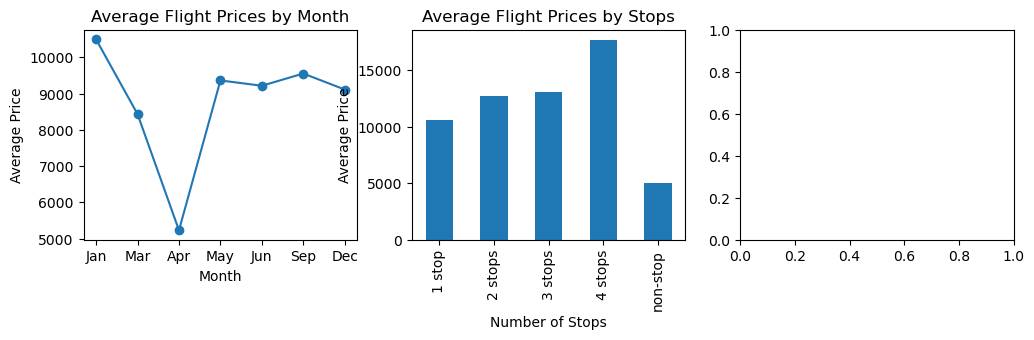

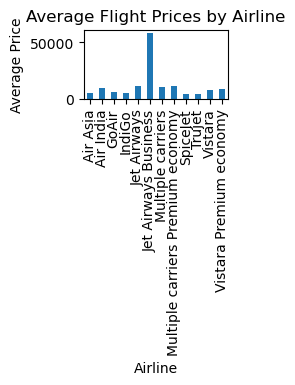

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar 


df = pd.read_excel('flight_price.xlsx')
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
monthly_avg_prices = df.groupby('Journey_Month')['Price'].mean()
available_months = df['Journey_Month'].unique()
months = [calendar.month_abbr[i] for i in sorted(available_months)]
stops_avg_prices = df.groupby('Total_Stops')['Price'].mean()
source_destination_avg_prices = df.groupby(['Source', 'Destination'])['Price'].mean().unstack()
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
hourly_avg_prices = df.groupby('Dep_Hour')['Price'].mean()
airline_avg_prices = df.groupby('Airline')['Price'].mean()


plt.figure(figsize=(12, 6))


plt.subplot(2, 3, 1)
plt.plot(months, monthly_avg_prices, marker='o')
plt.title('Average Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

plt.subplot(2, 3, 2)
stops_avg_prices.plot(kind='bar')
plt.title('Average Flight Prices by Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price')

plt.subplot(2, 3, 3)
source_destination_avg_prices.plot(kind='bar', stacked=True)
plt.title('Average Flight Prices by Source and Destination')
plt.xlabel('Source')
plt.ylabel('Average Price')


ax = plt.subplot(2, 3, 4)
plt.plot(hourly_avg_prices.index, hourly_avg_prices.values, marker='o')
plt.title('Average Flight Prices by Departure Hour')
plt.xlabel('Hour of Departure')
plt.ylabel('Average Price')
ax.remove()  

plt.subplot(2, 3, 5)
airline_avg_prices.plot(kind='bar')
plt.title('Average Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()


Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?


<AxesSubplot: xlabel='Airline', ylabel='Price'>

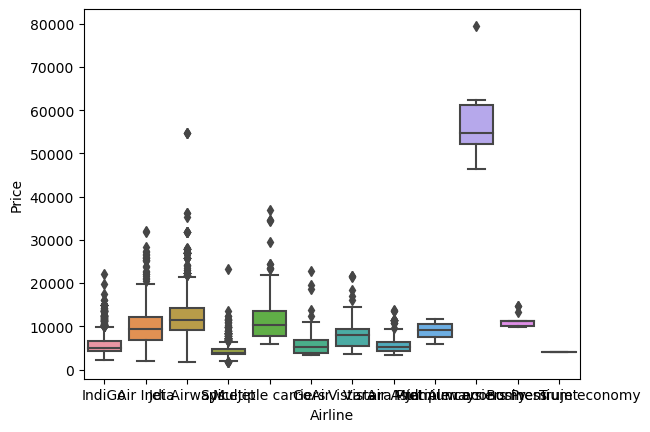

In [9]:
sns.boxplot(data=df,x="Airline",y="Price")

<AxesSubplot: xlabel='Journey_Month', ylabel='Price'>

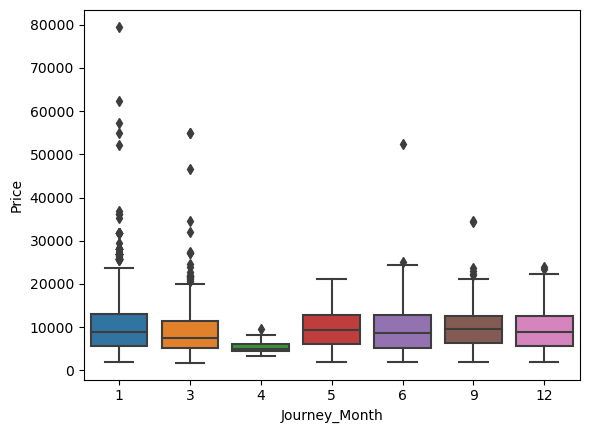

In [10]:
sns.boxplot(data=df,x="Journey_Month",y="Price")

osbervation :- 

book the ticket in april because the price is very less as compare with other months



The average price of air india , air asia , Go air ,indico , spicejet , trujet is very less

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?


observation:- 

 1. the price of flight is high in january and less in april and the price in may to december is approximately same 
 
 2. the price of flight is less when flight is non stop and price is increasing according to stops (1-2-3-4 price increase like this ) 
 
 3. The average price of air india , air asia , Go air ,indico , spicejet , trujet is very less




Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?


In [11]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
rows , columns = df.shape
print("the total rows ",rows,"and the number of columns are ",columns)

the total rows  10841 and the number of columns are  13


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.


<AxesSubplot: xlabel='Category', ylabel='Rating'>

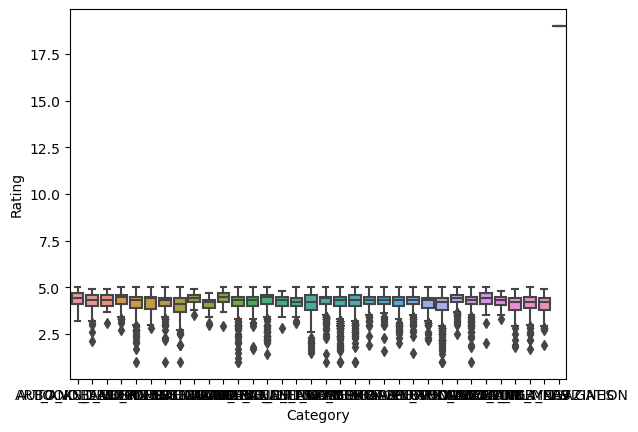

In [12]:
sns.boxplot(data=df,x="Category",y="Rating")

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.


In [13]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are 1474 null value in rating column and 1 null value in Type and content rating and 3 null value in android ver and 8 null value in current var

we need to remove null or missing value by mean,mode and median because missing value should not be present in data set beacuse model cannot read null value so with null values we cannot train model or the accuracy of the model can be low due to it 

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.


<AxesSubplot: xlabel='Rating', ylabel='Size'>

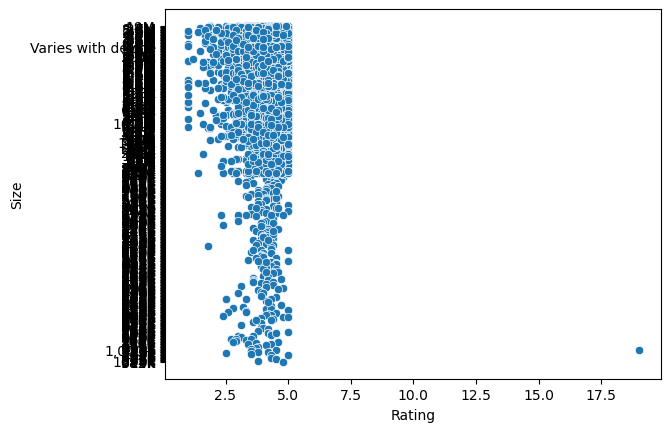

In [14]:
sns.scatterplot(data=df,x="Rating",y="Size")

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


In [15]:
char_to_remove=[",","$"]
columns_to_change=["Price"]

for items in char_to_remove:
    for i in columns_to_change:
        if i == "Everyone":
            df[i]=df[i].str.replace("Everyone",100)
        else:
            
            df[i]=df[i].str.replace(items,"")
        


/tmp/ipykernel_3972/4242665699.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i]=df[i].str.replace(items,"")


<AxesSubplot: xlabel='Price', ylabel='Type'>

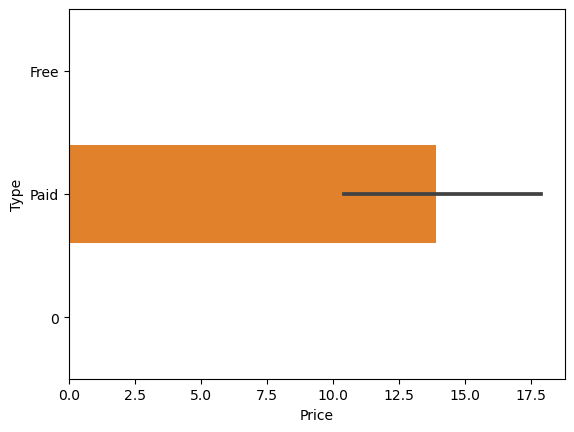

In [16]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

sns.barplot(data=df,x="Price",y="Type")

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.


In [29]:
char_to_remove=["+"]
columns_to_change=["Installs"]

for items in char_to_remove:
    for i in columns_to_change:
        df[i]=df[i].replace(items,"")
df["Installs"]=df["Installs"].astype(float)

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?
Flight


In [30]:
df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

The family category is the top or capute the highest area so the company should launch the app in this category 

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?


Category , Rating , Reviews, Genres


the visualizations graph can use :-


bar graph



histogram 



piechat 
and many more 
       

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

In [37]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,NaN,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,NaN,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [38]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

To identify the best time to launch a new app in the Google Play Store, you can analyze various features and use different data visualizations to present your findings effectively. Here are the features to analyze and data visualizations to consider using the provided dataset columns:

**Features to Analyze:**

1. **App Category:**
   - Analyze which app categories are popular or have a high growth rate. This can help you target a category with less competition.

2. **App Ratings and Reviews:**
   - Examine the average app ratings and the number of reviews. Apps with higher ratings and a substantial number of reviews are generally more successful.

3. **Installs:**
   - Evaluate the total number of installs. It's essential to understand which apps are widely adopted.

4. **App Type:**
   - Investigate whether free or paid apps are more successful in your target category. This can help you decide on a pricing strategy.

5. **Price:**
   - Analyze the pricing strategy of apps within your chosen category. Identify the price range that attracts more users.

6. **Content Rating:**
   - Determine which content rating categories (e.g., Everyone, Teen, Mature) are prevalent in your target category.

7. **Last Updated:**
   - Examine how frequently successful apps in your chosen category are updated. Frequent updates can indicate active development.
Data Visualizations to Use:-

Bar Charts and Histograms
   

Box Plots
   
Heatmaps
   
Scatter Plots
  
Pie Charts or Donut Charts
